In [48]:
# Import Library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
import threading

In [49]:
"""Membuat function untuk menampilkan plot/gambar image"""
def subplot(imgbank, labels):
  fig, axs = plt.subplots(1,len(imgbank), figsize = (24,32))
  for i in range(len(imgbank)):
    axs[i].imshow(imgbank[i],'gray')
    axs[i].title.set_text(labels[i])

In [50]:
"""Function untuk mengubah gambar ke grayscale"""
def gray(img):
    img = 0.2989 * img[...,0] + 0.5870 * img[...,1] + 0.1140 * img[...,2]
    return img

In [51]:
"""Membuat fungsi tresholding image"""
def threshold(img,T = 127):
  #Membuat kondisi channel image
  if(len(img.shape)>2):
    print("Please insert grayscale or 2 channeled image") 
    return img
  else:
    img[img>T] = 255
    img[img<=T] = 0
  return normalisasi(img)

In [52]:
"""Fungsi Normalisasi"""
def normalisasi(citra):
  min = np.min(citra)
  max = np.max(citra)
  return np.round((citra-min)*1/(max-min))

In [53]:
"""Membuat function untuk melakukan proses erosi, dilatasi, opening dan closing"""
def cekErosi(temp,element):
    """membuat potongan matriks yang diperiksa menjadi 1 dimensi"""
    temp = temp.ravel()
    for i in range(len(temp)):
      """jika piksel element bernilai 1 akan tetapi piksel potongan matriks yang 
      diperiksa tidak sama dengan satu maka return false"""
      if(element[i] == 1 and temp[i] != 1): 
        return False
    """ jika semua bernilai True maka penambahan piksel dapat dilakukan (True)"""
    return True

def erosi(citra,kernel):
    tinggi, lebar = kernel.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros(citra.shape,np.uint8)  #mendeklarasi citra hasil
    pad = np.pad(citra,(tinggi, lebar),mode='edge') #memberikan padding pada citra
    kernel = kernel.ravel()
    for i in range(tinggi,len(pad)-tinggi):  #melakukan perulangan pada nilai asal citra yg telah di padding
        for j in range(lebar,len(pad[i])-lebar):  #melakukan perulangan pada nilai asal citra yang telah dipadding
            temp = pad[i-tinggi:i+tinggi+1,j-lebar:j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = cekErosi(temp,kernel) 
            if(cek):
              result[i-tinggi][j-lebar] = 1
    return result #return result

def dilasi(citra,element):
    tinggi, lebar = element.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros(citra.shape,np.uint8) #mendeklarasi citra hasil
    pad = np.pad(citra,(tinggi,lebar),mode='constant') #memberikan padding pada citra
    for i in range(tinggi,len(pad)-tinggi):  #melakukan perulangan pada baris nilai asal citra yg telah di padding
        for j in range(lebar,len(pad[i])-lebar):  #melakukan perulangan pada kolom nilai asal citra yg telah di padding
            temp = pad[i-tinggi:i+tinggi+1,j-lebar:j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = (temp == 1) & (element == 1) 
            if(np.any(cek)): #jika terdapat piksel dimana element bernilai satu dan potongan matriks juga bernilai satu 
              result[i-tinggi][j-lebar] = 1 #maka pixel origin citra diberi nilai 1
    return result 
""""Opening merupakan gabungan dari proses dilasi dan erosi, urutannya erosi>dilasi"""
def opening(im,element):
  return dilasi(erosi(im,element),element)

""""Opening merupakan gabungan dari proses dilasi dan erosi, urutannya dilasi>erosi"""
def closing(im,element):
  return erosi(dilasi(im,element),element)

In [54]:
# mendefinisikan elips structure element
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

In [55]:
"""import image (hitam putih (duplikat))"""
imgpath = 'new_dir/'
imgbank = []
labels = []
i = 0
for filename in os.listdir(imgpath):
    imgbank.append(cv2.imread(imgpath+filename))
    imgbank[i] = cv2.cvtColor(imgbank[i],cv2.COLOR_BGR2RGB)
    labels.append(filename)
    i+=1

In [56]:
"""import original image"""
imgpath = 'dataset/resized/'
original = []
i = 0
for filename in os.listdir(imgpath):
    original.append(cv2.imread(imgpath+filename))
    original[i] = cv2.cvtColor(original[i],cv2.COLOR_BGR2RGB)
    i+=1

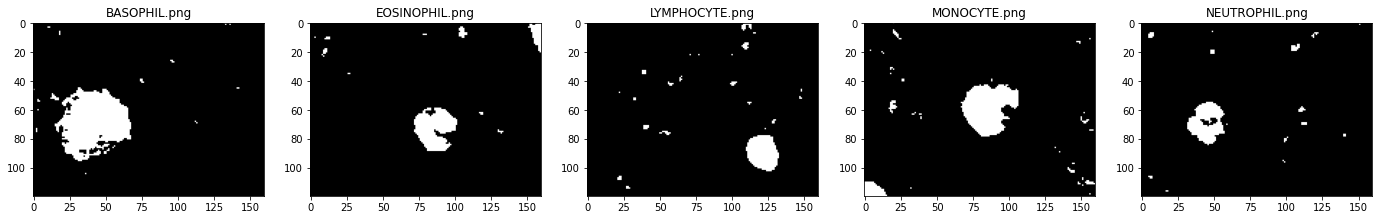

In [57]:
"""Menampilkan image black and white"""
subplot(imgbank, labels)

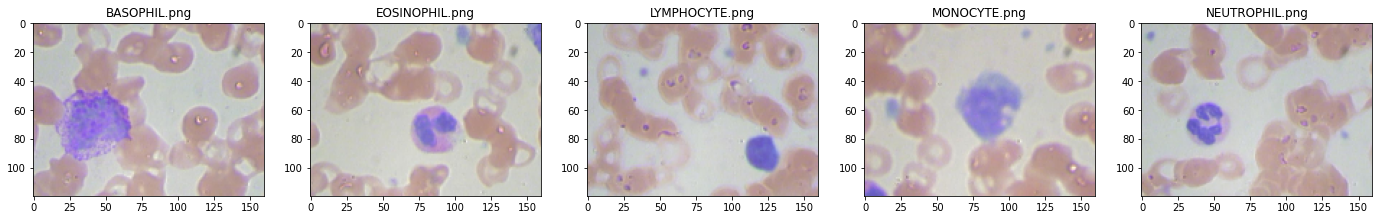

In [58]:
"""Menampilkan image original"""
subplot(original, labels)

In [59]:
"""mengubah image menjdai grayscale"""
gray_img = []
for img in imgbank:
    gray_img.append(gray(img))

"""Melakukan Treshold pada semua image"""
thresh = []
for img in gray_img:
    thresh.append(threshold(img))

In [60]:
"""Membuat array untuk menyimpan hasil """
erosion_img = []
dilation_img = []
opening_img = []
closing_img = []


In [61]:
for img in thresh:
    erosion_img.append(erosi(img, element))
    dilation_img.append(dilasi(img, element)) 

In [62]:
#opening
for img in erosion_img:
    opening_img.append(dilasi(img, element))

#closing
for img in dilation_img:
    closing_img.append(erosi(img, element))
        

Hasil erosi : 


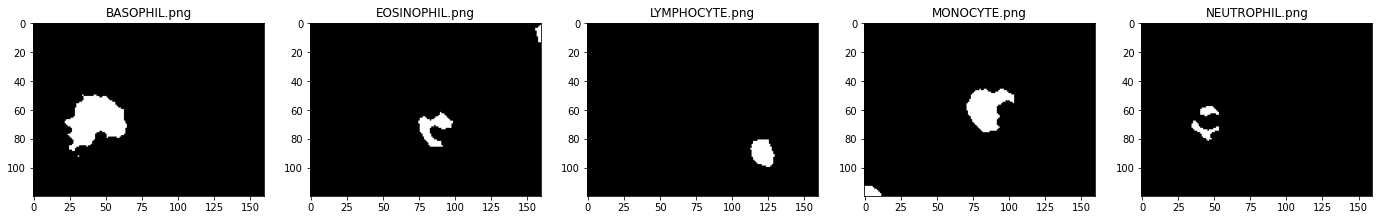

In [63]:
print("Hasil erosi : ")
subplot(erosion_img, labels)

Hasil dilasi : 


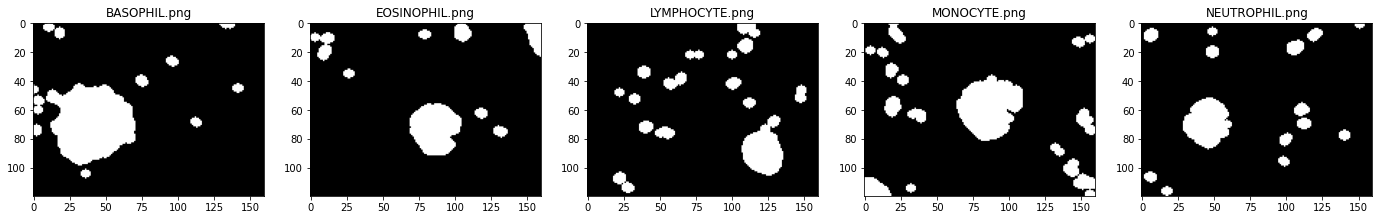

In [64]:
print("Hasil dilasi : ")
subplot(dilation_img, labels)

Hasil opening : 


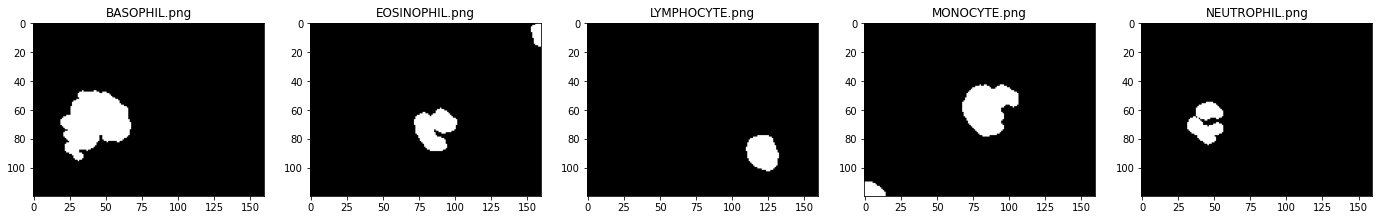

In [65]:
print("Hasil opening : ")
subplot(opening_img, labels)

Hasil closing : 


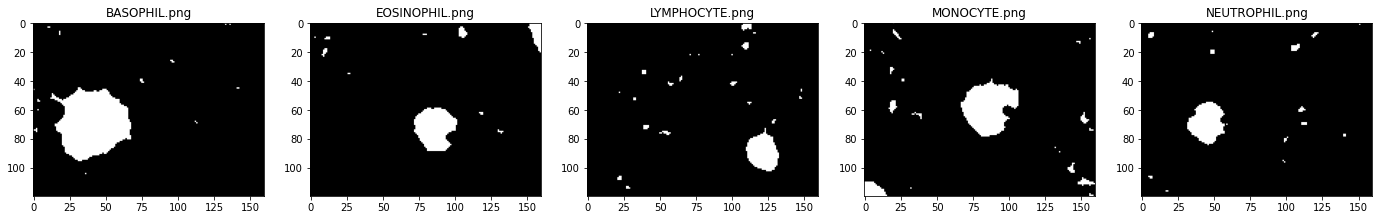

In [66]:
print("Hasil closing : ")
subplot(closing_img, labels)

## SOAL JURNAL
Terdapat lima buah citra sel darah putih sebagai berikut :

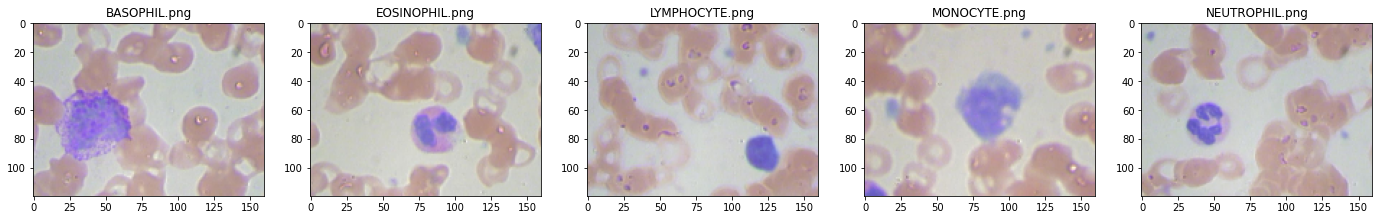

In [67]:
subplot(original, labels)

kemudian dilakukan segmentasi warna dari citra tersebut sehingga menghasilkan citra sebagai berikut : 

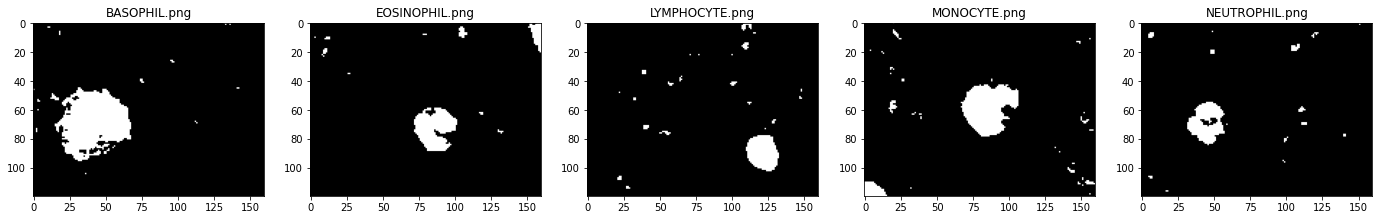

In [68]:
subplot(imgbank, labels)

Lakukanlah proses morfologi citra pada gambar-gambar tersebut (erosi, dilasi, opening, dan closing) dengan kernel ellips berukuran 7 x 7, kemudian simpulkan hasil dari pengamatan citra setelah dilakukan proses morfologi